<p style="color: red; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 1. Setup & Load Data
</p>


<p style="color: blue; font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
 Core libraries
</p>


In [17]:
import pandas as pd
import numpy as np

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
 Visualization
</p>


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
SQL
</p>


In [19]:
import sqlite3

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Display settings
</p>


In [20]:
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Load Iris dataset
</p>


In [21]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris(as_frame=True)
df = iris.frame
df.rename(columns={"target": "species"}, inplace=True)
df["species"] = df["species"].map(dict(enumerate(iris.target_names)))

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<p style="color: red; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 2. Descriptive Statistics & Univariate Analysis
</p>


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Summary Statistics
</p>


In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Categorical Distribution
</p>


In [25]:
df["species"].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Histograms
</p>


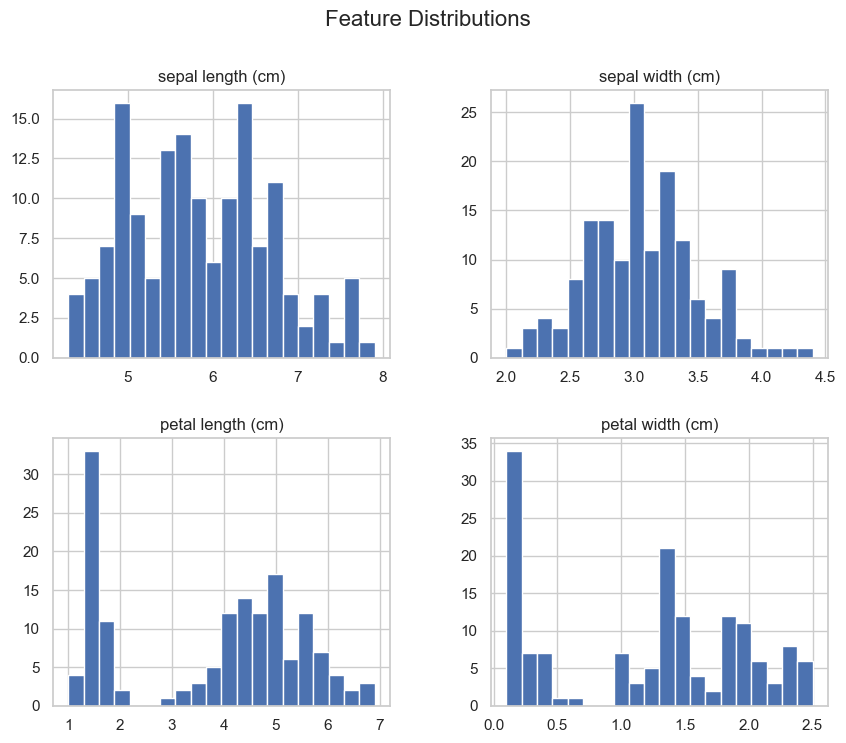

In [26]:
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
BoxPlot
</p>


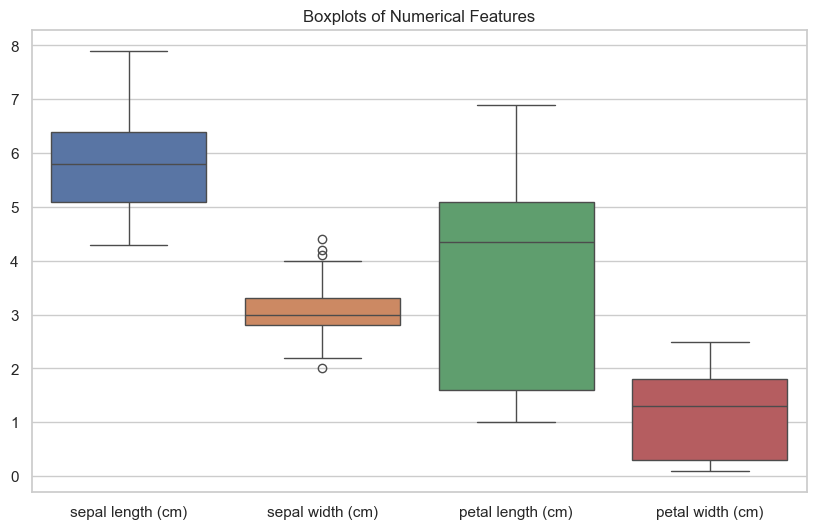

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns="species"))
plt.title("Boxplots of Numerical Features")
plt.show()

<p style="color: red; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 3. SQL for Business Questions
</p>


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Load Data into SQLite
</p>


In [31]:
conn = sqlite3.connect(":memory:")
df.to_sql("iris", conn, index=False, if_exists="replace")

150

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Business Questions & SQL Queries
</p>


<p style="color: green;font-size: 15px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Q1: Average petal length by species
</p>


In [34]:
query = """
SELECT species,
       ROUND(AVG(`petal length (cm)`), 2) AS avg_petal_length
FROM iris
GROUP BY species
ORDER BY avg_petal_length DESC;
"""
pd.read_sql(query, conn)


,species,avg_petal_length
0,virginica,5.55
1,versicolor,4.26
2,setosa,1.46


<p style="color: green;font-size: 15px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Q2: Species with largest average sepal width</p>


In [38]:
query = """
SELECT species,
       ROUND(AVG(`sepal width (cm)`), 2) AS avg_sepal_width
FROM iris
GROUP BY species
ORDER BY avg_sepal_width DESC
LIMIT 1;
"""
pd.read_sql(query, conn)


,species,avg_sepal_width
0,setosa,3.43


<p style="color: green;font-size: 15px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Q3: Count of samples per species
</p>


In [41]:
query = """
SELECT species, COUNT(*) AS count
FROM iris
GROUP BY species;
"""
pd.read_sql(query, conn)


,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


<p style="color: green;font-size: 15px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Q4: Records with large petals (> 5 cm)
</p>


In [43]:
query = """
SELECT *
FROM iris
WHERE `petal length (cm)` > 5;
"""
pd.read_sql(query, conn).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.0,2.7,5.1,1.6,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,5.8,2.7,5.1,1.9,virginica
3,7.1,3.0,5.9,2.1,virginica
4,6.3,2.9,5.6,1.8,virginica


<p style="color: red; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 4. Multivariate Analysis & Correlation
</p>


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Correlation Matrix
</p>


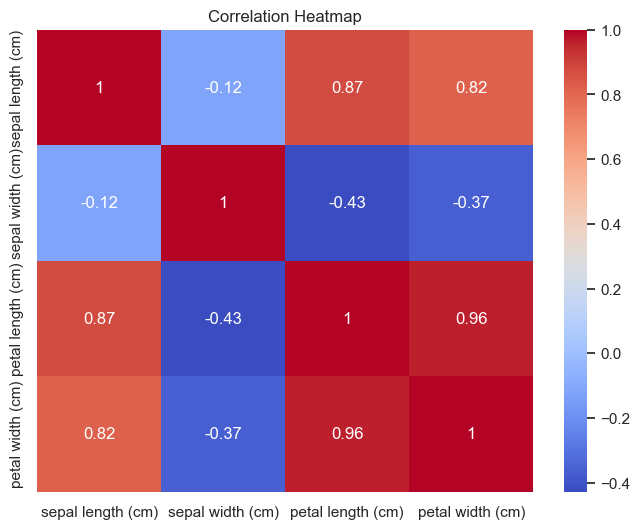

In [45]:
corr = df.drop(columns="species").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Pair Plot
</p>


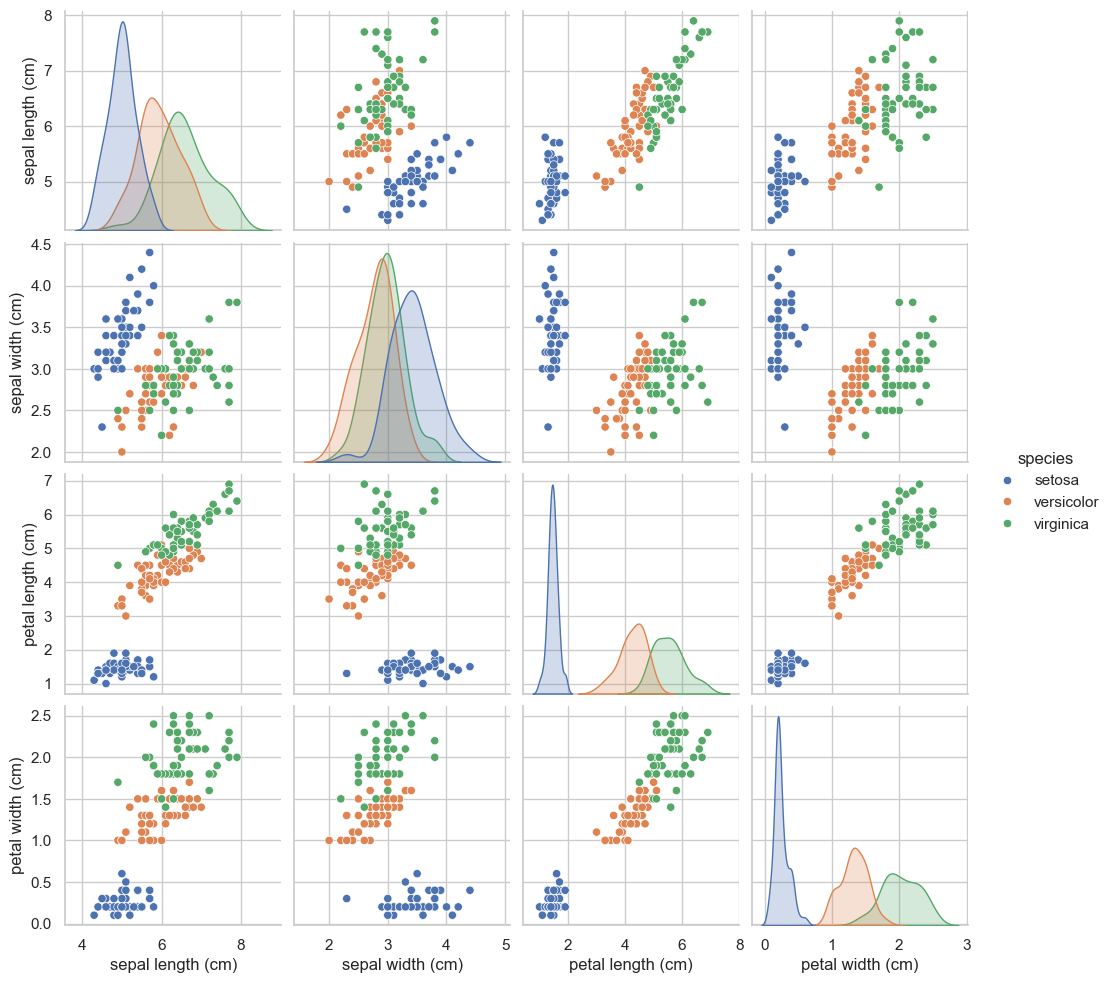

In [48]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Scatter Plot (Business Insight Example)
</p>


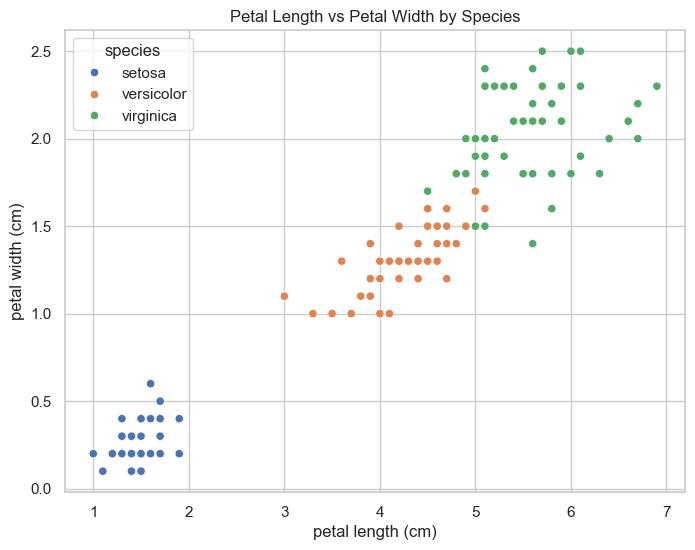

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="species"
)
plt.title("Petal Length vs Petal Width by Species")
plt.show()


<p style="color: red; font-size: 30px; font-weight: bold; text-align: center; font-family: 'Times New Roman', Times, serif;">
 5. Static Dashboard Mock-Up (Key KPIs)
</p>


<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
    KPI Calculations
</p>


In [53]:
kpis = {
    "Total Samples": len(df),
    "Avg Sepal Length": df["sepal length (cm)"].mean(),
    "Avg Petal Length": df["petal length (cm)"].mean(),
    "Most Common Species": df["species"].mode()[0]
}

kpis


{'Total Samples': 150,
 'Avg Sepal Length': np.float64(5.843333333333334),
 'Avg Petal Length': np.float64(3.7580000000000005),
 'Most Common Species': np.str_('setosa')}

<p style="color: blue;font-size: 20px; font-weight: bold; font-family: 'Times New Roman', Times, serif;">
Dashboard-Style Visualization
</p>


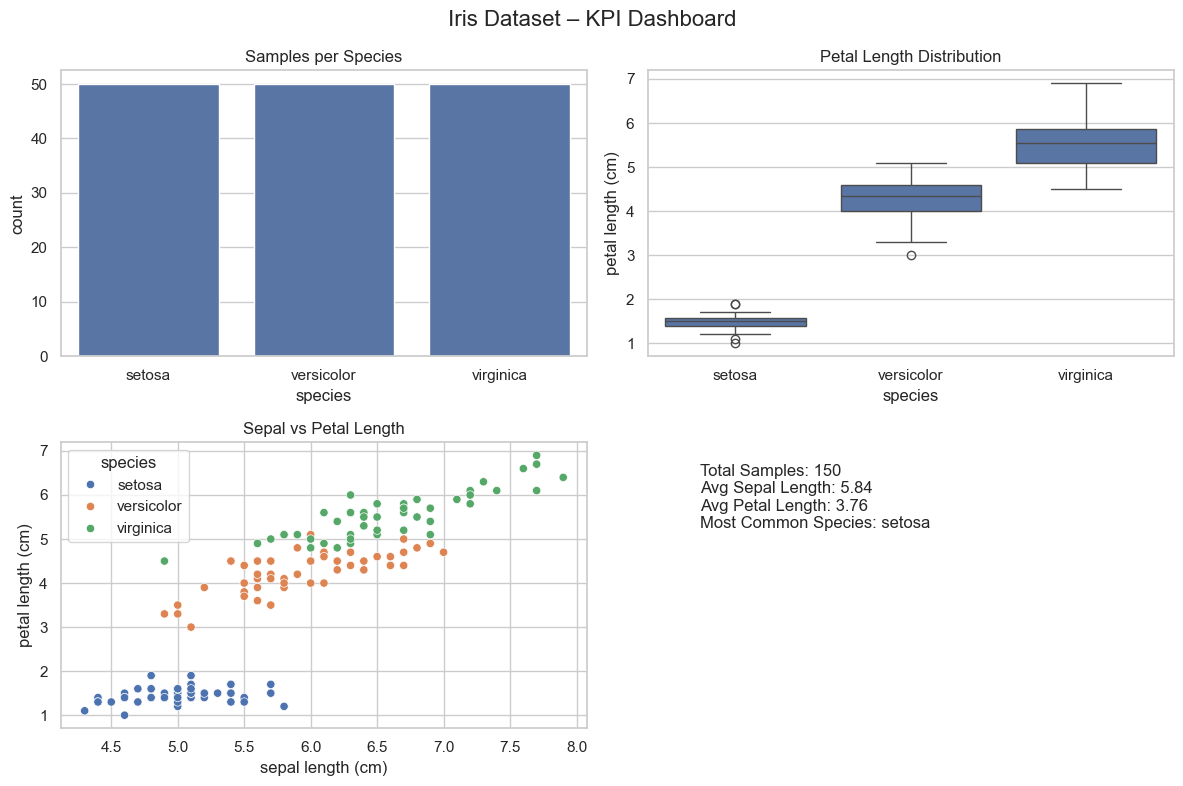

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Iris Dataset – KPI Dashboard", fontsize=16)

# Bar chart: Count per species
sns.countplot(data=df, x="species", ax=axes[0, 0])
axes[0, 0].set_title("Samples per Species")

# Boxplot: Petal length
sns.boxplot(data=df, x="species", y="petal length (cm)", ax=axes[0, 1])
axes[0, 1].set_title("Petal Length Distribution")

# Scatter plot
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="petal length (cm)",
    hue="species",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Sepal vs Petal Length")

# KPI Text
axes[1, 1].axis("off")
axes[1, 1].text(
    0.1, 0.7,
    "\n".join([f"{k}: {round(v,2) if isinstance(v,float) else v}" for k,v in kpis.items()]),
    fontsize=12
)

plt.tight_layout()
plt.show()
